# Module 3 - Structured Data 

Data Analytics is the process of discovering meaning and value in data to solve complex research questions, support evidence-based decision-making, and identify trends and patterns in data.

Data analytics is the process that enlables the augmentation of human intelligence about some business concern belonging to a specific context using a set of tools to analyse and extract insights from data.

<img src="graphics/data_analytics.png" width=50% />

This data can occur in three different formats:

- **Structured Data.** When the structure is predefined (for instance a database table). It is usually stored in a Database. 

- **Semi-Structured Data.** Data that does not reside in a relational database but that have some organizational properties that make it easier to analyze. With some process, you can store them in the relation database. Example: XML data.

- **Unstructured Data.** Data which is not organized in a pre-defined manner or does not have a pre-defined data model, thus it is not a good fit for a mainstream relational database. Example: Word, PDF, Text, Media logs

One of the primary aims of data analytics is to process semi-structured and unstructured data and put it in a structured format that is human understandable so it can be analysed. 

In this module, we will analyse data about the impacts of COVID-19 in different countries.

## Real World Case Study: The Impact of COVID-19 in Different Countries

In [1]:
# import libraries
import numpy as np              # used for algebraic operations      
import pandas as pd              # used for data manipulation and data analysis
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns           # used for visualisations

pd.set_option('display.max_rows', 500) # used to show all the rows in our dataset

In [2]:
# DAILY REPORTS ABOUT CONFIRMED, DEATHS AND RECOVERY CASES DOWNLOADED FROM JOHN HOPKINS UNIVERSITY
# source: https://github.com/CSSEGISandData/COVID-19

# load confirmed cases data
data_conf = pd.read_csv( "data/covid19_confirmed_global.csv" )

# load deaths data
data_deaths = pd.read_csv( "data/covid19_deaths_global.csv" )


In [3]:
# let's take a look at out data. 
# checking the confirmed covid19 cases data
data_conf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,851,852,852,852,852,852,852,852,852,853
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,86,86,86,88,91,92,96,113,118,130
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,19268,20197,21037,22020,22794,23620,24761,25987,27373,28764
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,10524,11221,11817,12364,13130,13325,13675,14103,14669,15281
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,107,107,107,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119


The first thing we notice is that there are entries in our dataset that do not have any data records. This is represented by the NaN entries. These entries are also reffered to missing values. As presented in module 1, part of the data analytics cycle is to clean the dataset and to address these missing entries. We will take a look at this later in this notebook.

After taking a quick look at our data, it is important to understand what are the variables or features (represented as columns) in our dataset. We can answer this question with the following line of code:

In [4]:
# what are the variables or features in our dataset?
data_conf.columns.to_list()

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


Our dataset has information about the:
- Province or State of a country
- the Country or region
- geographical coordinates: Latitude and Longitude
- a range of dates from the 22nd of January of 2020 until the 12th of June of 2020

But how many countries are represented in this dataset? Each country is an instance or an observation (represented as a row) in this dataset. So, we can get this information by counting the total number of rows of our dataset. We can do this by simply determining the dimensions of our dataset:

In [5]:
# get dimensions of the dataset: (number of rows, number of columns)
dims = data_conf.shape
dims

(266, 147)

In [6]:
# how many countries are represented in this dataset?

# number of countries / regions with confirmed cases.
# note that in Python, the indexing of data structures starts with 0. 
# So, index 0 selects the first entry of a list
num_countries_or_regions = dims[0] 

# %d -> integer
# %f -> float -> decimal
# %s -> string (chain of characters) / text

print( "There are %d of regions in our dataset" %num_countries_or_regions )

There are 266 of regions in our dataset


In [7]:
# what are the total number of recorded days in this dataset?

# remember the columns that we extracted from our dataset.
# 1st column:  Province/State
# 2nd column:  Country/Region
# 3rd column:  Lat
# 4th column: 'Long
# 5th column: 1/22/20

# this means that we can compute the total number of days with recorded cases by
# subtracting these 4 columns to the total number of columns in our dataset
num_days = dims[1] - 4

print("We have data reported over %d days" %num_days)

We have data reported over 143 days


In [19]:
data_conf['Long']

0       65.000000
1       20.168300
2        1.659600
3        1.521800
4       17.873900
5      -61.796400
6      -63.616700
7       45.038200
8      149.012400
9      151.209300
10     130.845600
11     153.400000
12     138.600700
13     145.970700
14     144.963100
15     115.860500
16      14.550100
17      47.576900
18     -77.396300
19      50.550000
20      90.356300
21     -59.543200
22      27.953400
23       4.000000
24       2.315800
25      90.433600
26     -63.588700
27      17.679100
28     -51.925300
29     114.727700
30      25.485800
31      -1.561600
32     -23.041800
33     104.916700
34      11.502100
35    -116.576500
36    -123.120700
37    -122.665500
38     -98.813900
39     -66.461900
40     -57.660400
41     -63.744300
42     -85.323200
43     -63.416800
44     -73.549100
45    -106.450900
46      20.939400
47      18.732200
48     -71.543000
49     117.226400
50     116.414200
51     107.874000
52     117.987400
53     101.058300
54     113.424400
55     108

In [16]:
# the 2nd and 3rd entries of our dataset correspond to the geographic
# coordinates of the country/region, so we can ignore these two for now

# the date of the first confirmed case of covid-19 that has been
# recoreded in this dataset is found on the 5th colum (5th index)
first_date = data_conf.columns[4] 

# the end of a list is represented by the index -1
last_date = data_conf.columns[-1]

print( "The first confirmed case recorded in the dataset was in %s" %first_date)
print("The last confirmed case recorded in the dataset was in %s" %last_date)

The first confirmed case recorded in the dataset was in 1/22/20
The last confirmed case recorded in the dataset was in 6/12/20


In [20]:
# what are the countries / regions that have reported confirmed covid-19 cases?

countries = data_conf["Country/Region"]
countries.to_list()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'Colombia',
 'Congo

In [21]:
# the above list has repeated entries in some countries
# this is because the data for some countries has been recorded by region

# we can remove duplicate entries out of a list in the following way
# what are the countries in the dataset? 
# what countries have reported confirmed covid-19 cases?
countries.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [22]:
# the total number of countries can be determined in the following way
num_countries = len( countries.unique() )

print("There are %d countries in this dataset with confirmed covid-19 cases" %num_countries)

There are 188 countries in this dataset with confirmed covid-19 cases


Let's simplify our analysis and let's get rid of the "Province/State" column since it is only present for a very small amount of countries, and also the Latitude and Longitude, because we will not use them for the analysis. We will do this for the dataset of confirmed cases and also for the dataset with deaths

In [27]:
# droping columns for confirmed covid-19 cases
confirmed_time_series = data_conf.drop(["Province/State", "Lat", "Long"], axis=1)

# droping columns for confirmed covid-19 deaths
deaths_time_series = data_deaths.drop(["Province/State", "Lat", "Long"], axis=1)

# let's take a quick look at Australia
confirmed_time_series[confirmed_time_series["Country/Region"] == "Australia"]

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
8,Australia,0,0,0,0,0,0,0,0,0,...,107,107,107,108,108,108,108,108,108,108
9,Australia,0,0,0,0,3,4,4,4,4,...,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119
10,Australia,0,0,0,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Australia,0,0,0,0,0,0,0,1,3,...,1060,1060,1061,1061,1062,1062,1062,1063,1064,1065
12,Australia,0,0,0,0,0,0,0,0,0,...,440,440,440,440,440,440,440,440,440,440
13,Australia,0,0,0,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Australia,0,0,0,0,1,1,1,1,2,...,1678,1681,1681,1685,1687,1687,1691,1699,1703,1703
15,Australia,0,0,0,0,0,0,0,0,0,...,592,592,596,599,599,599,599,601,602,602


One can see that Australia appears multiple times in our dataset. That is because Australia the recorded cases of covid19 in Australia were presented per State:

In [28]:
data_conf[data_conf["Country/Region"] == "Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1060,1060,1061,1061,1062,1062,1062,1063,1064,1065
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,440,440,440,440,440,440,440,440,440
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1678,1681,1681,1685,1687,1687,1691,1699,1703,1703
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,592,592,596,599,599,599,599,601,602,602


It would be nice to put all these cases separated by province/state in a single row representing the total number of confirmed cases in the country, in other words, we want to sum all the number of confirmed cases in each state and put them in a single row.

In [29]:
# group my data by country

# for the confirmed covid19 cases
confirmed_time_series = confirmed_time_series.groupby( "Country/Region" ).sum()

# and for the confirmed covid19 deaths
deaths_time_series = deaths_time_series.groupby( "Country/Region" ).sum()

# let's take a look
confirmed_time_series

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546
Albania,0,0,0,0,0,0,0,0,0,0,...,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416
Algeria,0,0,0,0,0,0,0,0,0,0,...,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698
Andorra,0,0,0,0,0,0,0,0,0,0,...,851,852,852,852,852,852,852,852,852,853
Angola,0,0,0,0,0,0,0,0,0,0,...,86,86,86,88,91,92,96,113,118,130
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
Argentina,0,0,0,0,0,0,0,0,0,0,...,19268,20197,21037,22020,22794,23620,24761,25987,27373,28764
Armenia,0,0,0,0,0,0,0,0,0,0,...,10524,11221,11817,12364,13130,13325,13675,14103,14669,15281
Australia,0,0,0,0,4,5,5,6,9,9,...,7240,7247,7252,7259,7265,7267,7274,7285,7289,7294


In [32]:
conf_cases_per_country = confirmed_time_series.iloc[:,-1]
conf_cases_per_country.tolist()

[23546,
 1416,
 10698,
 853,
 130,
 26,
 28764,
 15281,
 7294,
 17064,
 9218,
 103,
 17269,
 81523,
 96,
 52520,
 59819,
 20,
 388,
 62,
 16929,
 2893,
 48,
 828810,
 141,
 3191,
 892,
 261,
 85,
 697,
 126,
 8681,
 99595,
 2044,
 848,
 160846,
 84228,
 45344,
 163,
 728,
 4637,
 1612,
 4684,
 2249,
 2233,
 980,
 9938,
 12299,
 712,
 4441,
 18,
 22008,
 45778,
 41303,
 3481,
 1306,
 41,
 1970,
 472,
 2915,
 18,
 7073,
 193220,
 3463,
 28,
 843,
 187226,
 10856,
 3108,
 23,
 8982,
 4426,
 1460,
 159,
 3941,
 12,
 8132,
 4053,
 1807,
 297535,
 36406,
 182525,
 17770,
 25250,
 18795,
 236305,
 614,
 17250,
 915,
 13872,
 3305,
 12051,
 1326,
 34952,
 2166,
 19,
 1096,
 1422,
 4,
 421,
 409,
 82,
 1756,
 4055,
 9,
 1240,
 481,
 8402,
 2003,
 1752,
 645,
 1572,
 337,
 139196,
 11093,
 99,
 197,
 324,
 8610,
 509,
 31,
 5062,
 48668,
 1504,
 1464,
 978,
 15181,
 3701,
 8620,
 21071,
 125933,
 19211,
 8,
 1254,
 214788,
 24787,
 28577,
 36180,
 76588,
 21404,
 510761,
 510,
 15,
 19,
 27,
 69

Text(0.5, 1.0, 'Countries with most deaths by covid-19')

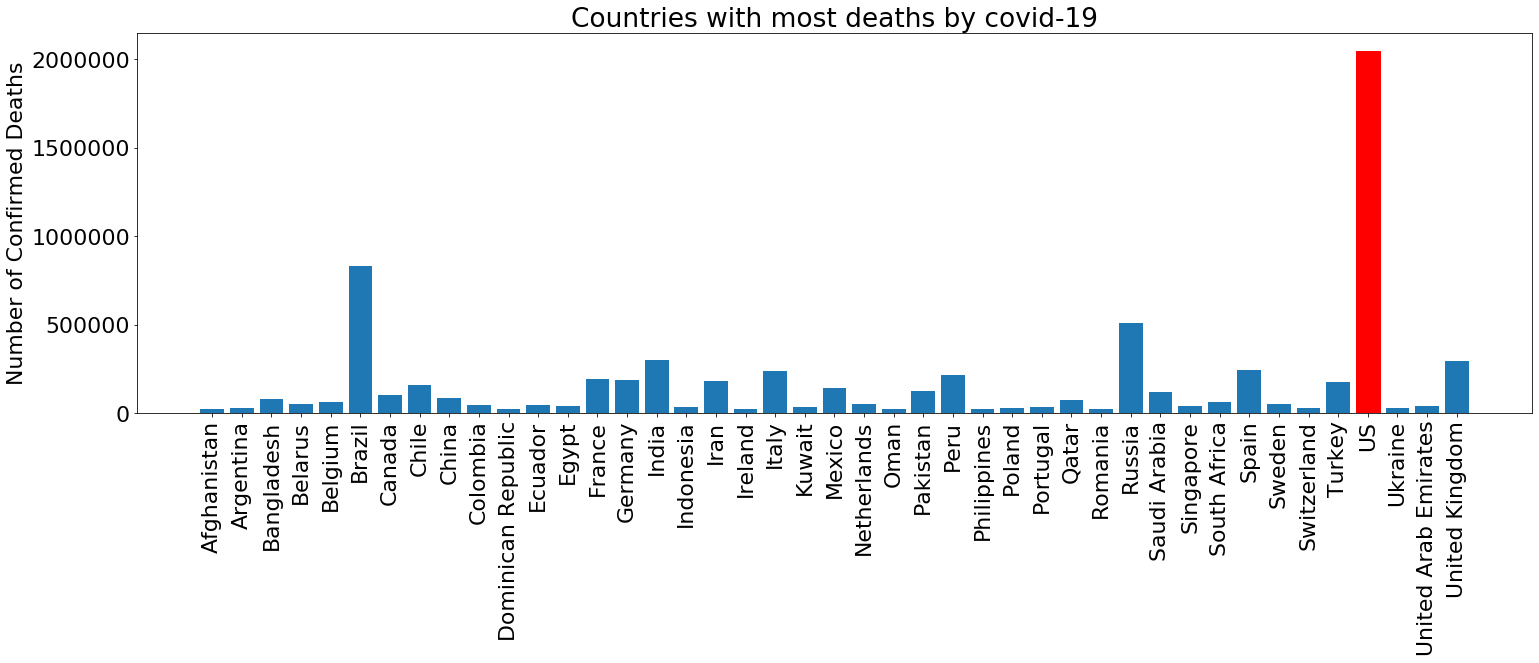

In [33]:
# setting fontsize of figure to 22
plt.rcParams.update({'font.size': 22})

# let's check the impact of the virus by country
conf_cases_per_country = confirmed_time_series.iloc[:,-1]

# let's look at countries with more than 20 000 cases, only
THRESHOLD = 20000
conf_cases_per_country = conf_cases_per_country[ conf_cases_per_country > THRESHOLD ]

x = conf_cases_per_country.index.tolist()
y = conf_cases_per_country.tolist()

# get the index of the country with the highest number of confirmed cases
max_cases_idx = y.index( max(y) )

fig = plt.figure(figsize=(25,7))

barlist = plt.bar(x, y)
barlist[max_cases_idx].set_color('r')
plt.xticks(ticks= x, rotation=90) 

plt.ylabel("Number of Confirmed Deaths")
plt.title('Countries with most deaths by covid-19')

Text(0.5, 1.0, 'Countries with most deaths by covid-19')

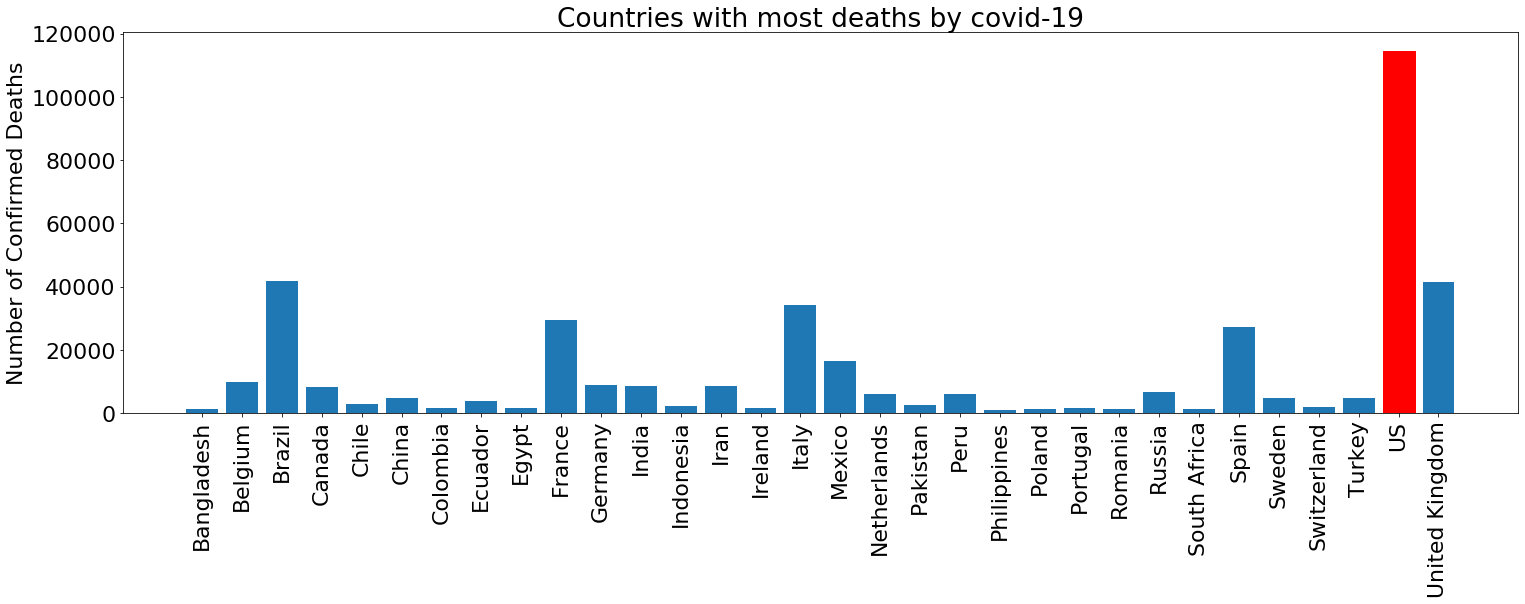

In [34]:
# setting fontsize of figure to 22
plt.rcParams.update({'font.size': 22})

# let's check the impact of the virus by country in terms of deaths
conf_deaths_per_country = deaths_time_series.iloc[:,-1]

# let's look at countries with more than 100 cases, only
THRESHOLD = 1000
conf_deaths_per_country = conf_deaths_per_country[ conf_deaths_per_country > THRESHOLD ]

x = conf_deaths_per_country.index.tolist()
y = conf_deaths_per_country.tolist()

# get the index of the country with the highest number of confirmed cases
max_deaths_idx = y.index( max(y) )
fig = plt.figure(figsize=(25,7))

barlist = plt.bar(x, y)
barlist[max_deaths_idx].set_color('r')

plt.xticks(ticks= x, rotation=90) 
plt.ylabel("Number of Confirmed Deaths")
plt.title('Countries with most deaths by covid-19')

Let's focus our analysis in Spain (one of the countries that got heavily affected by the virus)

In [35]:
# note that when you use the groupby operation, you are changing the way you are accessing the data
# in this case, the column "Country/Region" is now being used to index the data
# you can access its information in the following way
spain_confirmed_cases = confirmed_time_series[ confirmed_time_series.index == "Spain"]
spain_confirmed_deaths = deaths_time_series[ deaths_time_series.index == "Spain"]

spain_confirmed_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Spain,0,0,0,0,0,0,0,0,0,0,...,240326,240660,240978,241310,241550,241717,241966,242280,242707,243209


Let's visualise this information

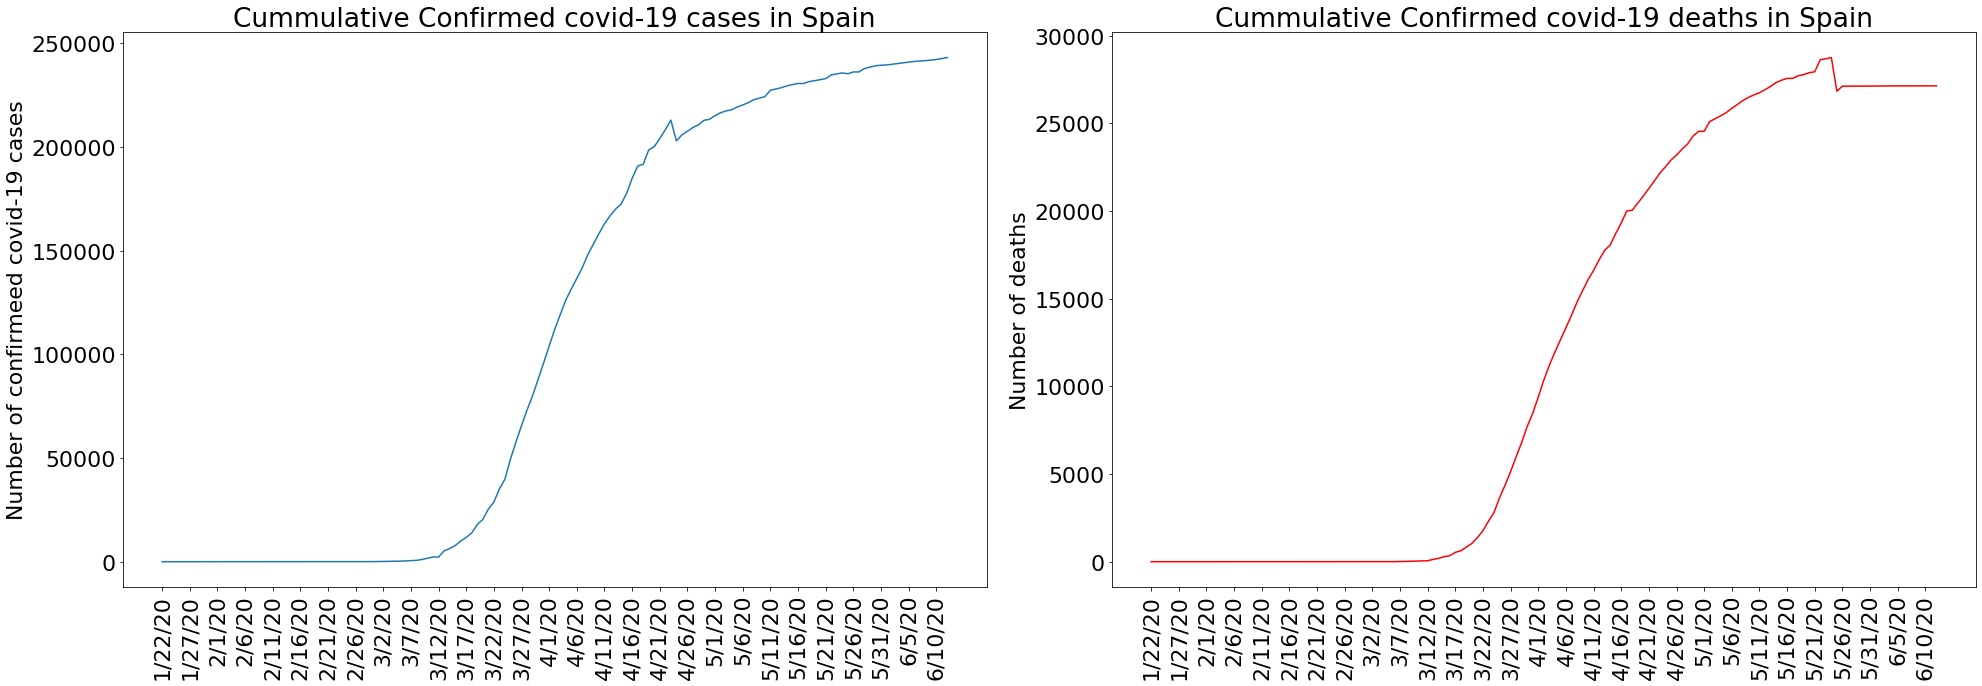

In [36]:
# setting fontsize of figure to 22
plt.rcParams.update({'font.size': 22})

# get dates
dates = spain_confirmed_cases.columns.to_list()

# initialise figure
fig = plt.figure(figsize=(28,10))

# plot confirmed cases
cases = spain_confirmed_cases.values[0]

plt.subplot(1, 2, 1)
plt.plot(dates, cases) # default color is blue
plt.title('Cummulative Confirmed covid-19 cases in Spain')
plt.ylabel('Number of confirmeed covid-19 cases')
# adding dates on the x-axis every 10 days
plt.xticks(ticks= range(0, len(dates), 5), rotation=90)
plt.tight_layout()

# plot confirmed deaths
deaths = spain_confirmed_deaths.values[0]

plt.subplot(1, 2, 2)
plt.plot(dates, deaths, c="r") # setting color to red
plt.title('Cummulative Confirmed covid-19 deaths in Spain')
plt.ylabel('Number of deaths')
# adding dates on the x-axis every 10 days
plt.xticks(ticks= range(0, len(dates), 5), rotation=90) 
plt.tight_layout()

plt.show()

Our dataset has information about the cummulative number of confirmed cases with covid-19. Perhaps calculating the daily number of confirmed cases might gives us better insights.

In [37]:
# we can define a function to convert the cummulative counts into daily counts

# FUNCTION: get_data_per_day
# takes a series of cummulative data counts 
# and converts to daily data counts
# cum_data: list 
# return: list
def get_data_per_day( cum_data ):
    
    cases_per_day = [0]  # list to return. Initially there are 0 cases
    
    # for each data point... 
    # subtract the following day cases with the current cases
    for i in range( 0, len(cum_data)-1):
        
        current_day =  cum_data[i]  # current data
        next_day = cum_data[i+1]    # following day data
        cases_per_day.append( np.abs(next_day - current_day) ) # add data to result list
    
    return cases_per_day

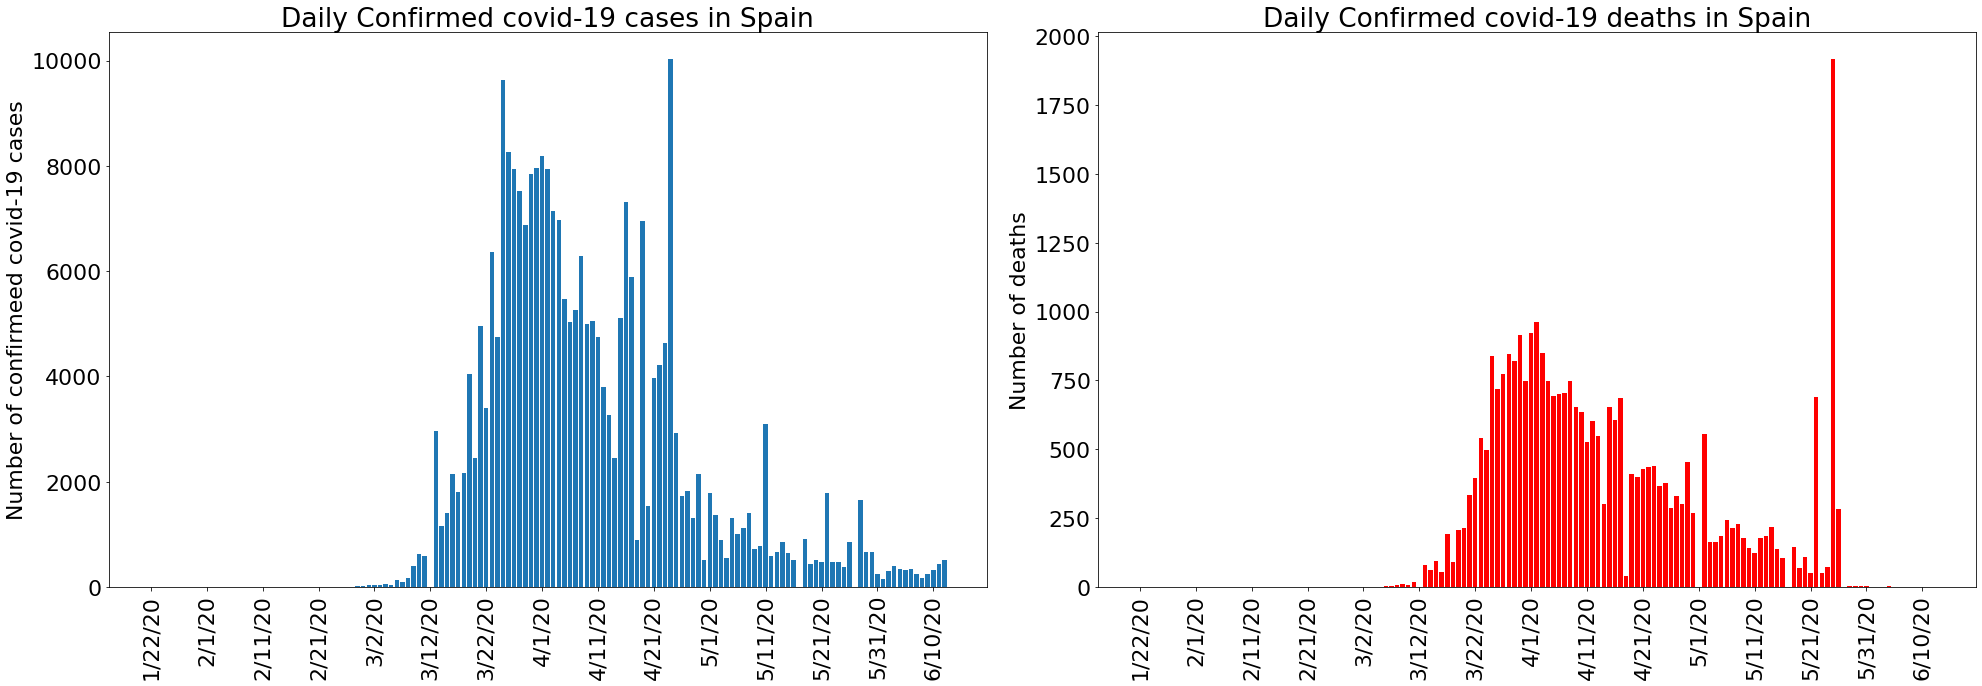

In [38]:
# setting fontsize of figure to 22
plt.rcParams.update({'font.size': 22})

# get dates
dates = spain_confirmed_cases.columns.to_list()

# initialise figure
fig = plt.figure(figsize=(28,10))

# plot confirmed cases
cases = get_data_per_day(spain_confirmed_cases.values[0])

plt.subplot(1, 2, 1)
plt.bar(dates, cases) # default color is blue
plt.title('Daily Confirmed covid-19 cases in Spain')
plt.ylabel('Number of confirmeed covid-19 cases')
plt.xticks(ticks= range(0, len(dates), 10), rotation=90)
plt.tight_layout()

# plot confirmed deaths
deaths = get_data_per_day(spain_confirmed_deaths.values[0])

plt.subplot(1, 2, 2)
plt.bar(dates, deaths, color='r') # setting color to red
plt.title('Daily Confirmed covid-19 deaths in Spain')
plt.ylabel('Number of deaths')
plt.xticks(ticks= range(0, len(dates), 10), rotation=90)
plt.tight_layout()

plt.show()

Absolute levels are still very ambiguous. If a country has a big population, these graphs may not provide us much insights. Perhaps it would be better to compute the number of confirmed cases and confirmed deaths per million. Knowing that Spain has a population of approximatelly 47 million, let's adjust the above analysis to reflect numbers per million

In [39]:
# FUNCTION: data_per_million
# takes a series of data 
# and converts to values per million
# data: list 
# return: list
def data_per_million( data, population, MILLION ):
    
    data_per_million = []
    for data_per_day in get_data_per_day( data ):
        val = (data_per_day*MILLION)/population
        data_per_million.append(val)
        
    return data_per_million
    

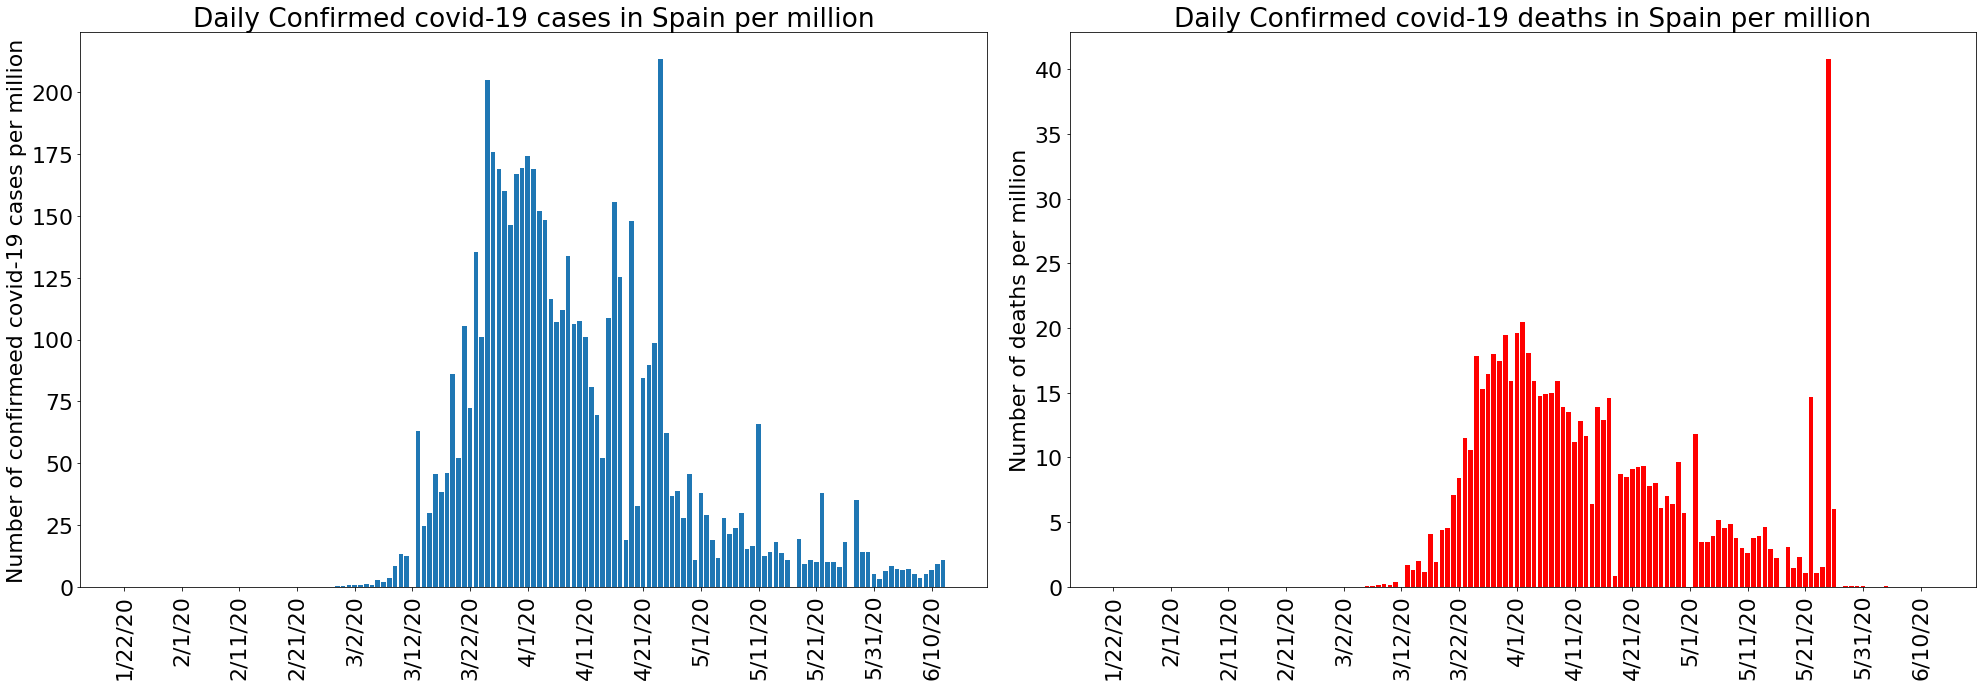

In [40]:
MILLION = 1000000.0
population = 47 * MILLION # defining the population in Spain in millions of people

# setting fontsize of figure to 22
plt.rcParams.update({'font.size': 22})

# get dates
dates = spain_confirmed_cases.columns.to_list()

# initialise figure
fig = plt.figure(figsize=(28,10))

# plot confirmed cases

# computing the confirmed
cases_per_million = data_per_million( spain_confirmed_cases.values[0], 
                                     population, MILLION )
    
plt.subplot(1, 2, 1)
plt.bar(dates, cases_per_million) # default color is blue
plt.title('Daily Confirmed covid-19 cases in Spain per million')
plt.ylabel('Number of confirmeed covid-19 cases per million')
plt.xticks(ticks= range(0, len(dates), 10), rotation=90)
plt.tight_layout()

# plot confirmed deaths
deaths_per_million = data_per_million( spain_confirmed_deaths.values[0], 
                                       population, MILLION )
plt.subplot(1, 2, 2)
plt.bar(dates, deaths_per_million, color='r') # setting color to red
plt.title('Daily Confirmed covid-19 deaths in Spain per million')
plt.ylabel('Number of deaths per million')
plt.xticks(ticks= range(0, len(dates), 10), rotation=90)
plt.tight_layout()

plt.show()



## Exercise: Full lockdown, late lockdown and soft lockdown - Australia vs. Spain vs. Sweden

In this module we presented two datasets containing the impact in terms of confirmed covid-19 cases and deaths in different countries. We made a setailed analysis for Spain. 

Can you repeat the same analysis, but for Australia and Sweden? Knowing that Australia has a population of approximately 25 million people and Sweden approximately 10.2 million, can you make an analysis between countries who went on a lockdown very early (Australia), compared to countries that entered in lockdown already late (Spain), and countries that did not fully enter into a restrict lockdown (Sweden)?  

In [41]:
# YOUR ANSWER HERE

# load confirmed cases data: data/covid19_confirmed_global.csv
data_conf = pd.read_csv("data/covid19_confirmed_global.csv")

# load deaths data: data/covid19_deaths_global.csv
data_deaths = pd.read_csv("data/covid19_deaths_global.csv")

# take a look at the data_conf dataset
# YOUR ANSWER HERE:
data_conf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,851,852,852,852,852,852,852,852,852,853
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,86,86,86,88,91,92,96,113,118,130
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,19268,20197,21037,22020,22794,23620,24761,25987,27373,28764
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,10524,11221,11817,12364,13130,13325,13675,14103,14669,15281
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,107,107,107,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119


In [43]:
# remove the columns containing geographical information and information about the Province
# YOUR ANSWER HERE

# for the confirmed cases
confirmed_data_simplified = data_conf.drop( ["Province/State", "Lat", "Long"], axis=1 )

# for the confirmed deaths
deaths_data_simplified = data_deaths.drop( ["Province/State", "Lat", "Long"], axis=1 )


In [ ]:
# group data by country

# YOUR ANSWER HERE
# for the confirmed covid19 cases
confirmed_time_series = 

# and for the confirmed covid19 deaths
deaths_time_series = 


In [ ]:
# select all the confirmed cases and confirmed deaths from Australia
# YOUR ANSWER HERE
australia_confirmed_cases =
australia_confirmed_deaths = 

# select all the confirmed cases and confirmed deaths from Sweden
# YOUR ANSWER HERE
sweden_confirmed_cases =
sweden_confirmed_deaths = 

In [ ]:
# plot the daily number of confirmed cases and confirmed deaths from Australia per million

# YOUR ANSWER HERE



In [ ]:
# plot the daily number of confirmed cases and confirmed deaths from Sweden per million

# YOUR ANSWER HERE


Compare the different graphs obtained for Australia, Sweden and our previous analysis from Spain.

From the graphs, m,ake a small discussion about the number of confirmed cases and deaths per million for each country and analyse it in lights of their lockdown policies: Australia - strict lockdown, Spain - late lockdown, Sweden - soft lockdown

**YOUR ANSWER HERE**

- Australia (strict lockdown): 

- Spain (late lockdown): 

- Sweden (soft lockdown):